## Работу выполнил Осинский А. Студент группы ПМ23-2

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Настройка стилей графиков
sns.set(style="whitegrid")


# Наилучшая Модель Филлипса для Португалии

В данном ноутбуке мы построим и проанализируем модель Филлипса для Португалии на основе данных о **уровне инфляции** и **безработице** за период с 1980 по 2018 год. Основные шаги анализа включают:

1. **Разбор алгоритмов Теста Jarque-Bera и Теста Колмогорова-Смирнова**
2. **Проверка остатков модели на нормальность визуально и при помощи тестов: согласия Хельвига, Шапиро—Вилька, Jarque-Bera**
3. **Теоретические условия применения каждого из тестов**
4. **Проверка модели на адекватность**

---


## Загрузка и Подготовка Данных

Ниже представлены данные по уровню инфляции и безработице для Португалии за период с 1980 по 2018 год.


In [14]:
import numpy as np
import pandas as pd
from scipy import stats

# Ваши данные
data = {
    'Inflation': [5.9, 21.2, 22.7, 25.1, 29.3, 19.3, 11.7, 9.4, 9.6, 12.6, 13.4, 
                  11.4, 8.9, 5.9, 5.0, 4.0, 2.9, 1.9, 2.2, 2.2, 2.8, 4.4, 
                  3.7, 3.2, 2.5, 2.1, 3.0, 2.4, 2.6, -0.9, 1.4, 3.6, 2.8, 
                  0.4, -0.2, 0.5, 0.6, 1.6, 1.2],
    'Unemployment': [7.8, -8.3, -7.5, 7.9, 10.5, -8.7, -8.6, -7.1, -7.1, -5.1, 
                     -4.2, -4.1, -3.9, 5.1, 6.3, 7.2, 7.3, -6.7, -4.9, -4.4, 
                     -3.9, 4.0, 5.0, 6.3, 6.6, 7.6, -7.6, 8.0, -7.6, 9.4, 
                     10.8, 12.7, 15.5, 16.2, -13.9, -12.4, -11.1, -8.9, 
                     -7.1]
}

df = pd.DataFrame(data)

# Функция для расчета теста Jarque-Bera
def jarque_bera_test(series):
    jb_stat, jb_pvalue = stats.jarque_bera(series)
    return jb_stat, jb_pvalue

# Пример применения к уровню инфляции
jb_stat_inf, jb_pvalue_inf = jarque_bera_test(df['Inflation'])
print(f"Jarque-Bera Test for Inflation:")
print(f"Statistic: {jb_stat_inf:.4f}, p-value: {jb_pvalue_inf:.4f}")

# Пример применения к уровню безработицы
jb_stat_unemp, jb_pvalue_unemp = jarque_bera_test(df['Unemployment'])
print(f"\nJarque-Bera Test for Unemployment:")
print(f"Statistic: {jb_stat_unemp:.4f}, p-value: {jb_pvalue_unemp:.4f}")


Jarque-Bera Test for Inflation:
Statistic: 18.1309, p-value: 0.0001

Jarque-Bera Test for Unemployment:
Statistic: 3.1665, p-value: 0.2053


## Разбор Алгоритмов Теста Jarque-Bera и Теста Колмогорова-Смирнова

### Тест Jarque-Bera

**Описание:**

Тест Jarque-Bera (JB) используется для проверки нормальности распределения выборки. Он основан на измерении асимметрии (skewness) и эксцесса (kurtosis) распределения данных.

- **Нулевая гипотеза (\( H_0 \))**: Данные распределены нормально.
- **Альтернативная гипотеза (\( H_1 \))**: Данные не распределены нормально.

**Формулы:**

1. **Выборочное среднее (\( \mu \)) и стандартное отклонение (\( \sigma \)):**

   $$
   \mu = \frac{1}{n} \sum_{i=1}^{n} x_i
   $$

   $$
   \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
   $$

2. **Асимметрия (S):**

   $$
   S = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \mu}{\sigma} \right)^3
   $$

3. **Эксцесс (K):**

   $$
   K = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \mu}{\sigma} \right)^4
   $$

4. **Статистика Jarque-Bera (\( JB \)):**

   $$
   JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
   $$

**Принятие решения:**

Статистика JB следует распределению Хи-квадрат с 2 степенями свободы. Для уровня значимости \( \alpha = 0.05 \) критическое значение составляет примерно 5.99.

- Если \( JB > 5.99 \), отвергаем \( H_0 \).
- Иначе, нет оснований отвергать \( H_0 \).

---

### Тест Колмогорова-Смирнова

**Описание:**

Тест Колмогорова-Смирнова (KS) используется для проверки соответствия эмпирического распределения данным теоретическому распределению (например, нормальному). Он измеряет максимальное отклонение между эмпирической функцией распределения (ECDF) и теоретической функцией распределения (CDF).

- **Нулевая гипотеза (\( H_0 \))**: Данные соответствуют нормальному распределению.
- **Альтернативная гипотеза (\( H_1 \))**: Данные не соответствуют нормальному распределению.

**Формула:**

Статистика KS определяется как максимальное абсолютное отклонение между ECDF и CDF:

$$
D = \sup_x |ECDF(x) - CDF(x)|
$$

**Принятие решения:**

- Если \( p\text{-value} < \alpha \), отвергаем \( H_0 \).
- Иначе, нет оснований отвергать \( H_0 \).

---

## Построение Модели Филлипса

Модель Филлипса описывает обратную зависимость между уровнем инфляции и уровнем безработицы. Мы построим простую линейную регрессию, где **инфляция** является зависимой переменной, а **безработица** — независимой.

---


In [15]:
# Подготовка данных для модели
X = df['Unemployment']
y = df['Inflation']

# Добавление константы для модели (intercept)
X = sm.add_constant(X)

# Построение модели OLS
model = sm.OLS(y, X).fit()

# Вывод результатов модели
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2582
Date:                Sun, 03 Nov 2024   Prob (F-statistic):              0.614
Time:                        21:09:17   Log-Likelihood:                -133.58
No. Observations:                  39   AIC:                             271.2
Df Residuals:                      37   BIC:                             274.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.7277      1.222      5.505   

## Проверка Остатков Модели на Нормальность

Перед проведением статистических тестов важно визуально оценить распределение остатков модели. Для этого построим **гистограмму** и **Q-Q (квантиль-квантиль) график**.


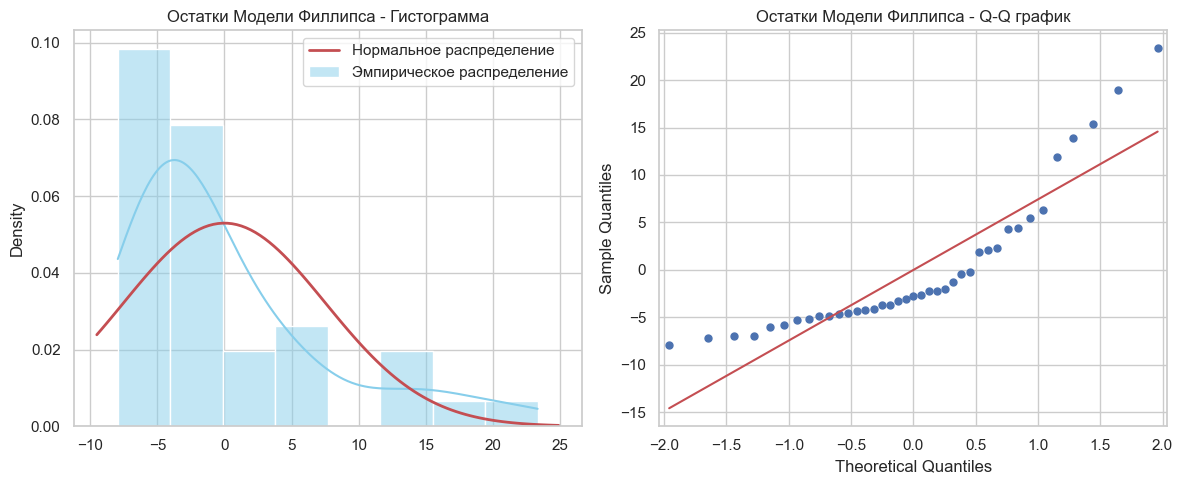

In [16]:
# Получение остатков модели
residuals = model.resid

# Функция для визуальной проверки нормальности
def plot_normality(series, title):
    plt.figure(figsize=(12, 5))
    
    # Гистограмма с наложенным нормальным распределением
    plt.subplot(1, 2, 1)
    sns.histplot(series, kde=True, stat="density", color='skyblue', label='Эмпирическое распределение')
    mu, sigma = np.mean(series), np.std(series, ddof=1)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'r', linewidth=2, label='Нормальное распределение')
    plt.title(f'{title} - Гистограмма')
    plt.legend()
    
    # Q-Q график
    plt.subplot(1, 2, 2)
    sm.qqplot(series, line='s', ax=plt.gca(), markersize=5)
    plt.title(f'{title} - Q-Q график')
    
    plt.tight_layout()
    plt.show()

# Визуализация для Остатков
plot_normality(residuals, 'Остатки Модели Филлипса')


## Статистические Тесты на Нормальность Остатков

Мы проведем следующие тесты для проверки нормальности распределения остатков:

1. **Shapiro-Wilk Test**
2. **Jarque-Bera Test**
3. **Kolmogorov-Smirnov Test**
4. **Anderson-Darling Test**

Каждый из этих тестов имеет свои особенности и предположения. Рассмотрим их подробнее.


### 1. Shapiro-Wilk Test

**Описание:**

Shapiro-Wilk тест используется для проверки нормальности распределения выборки. Он особенно мощен для небольших и средних выборок.

- **Нулевая гипотеза (\( H_0 \))**: Данные распределены нормально.
- **Альтернативная гипотеза (\( H_1 \))**: Данные не распределены нормально.

**Формула:**

Shapiro-Wilk тест основан на корреляции между отсортированными наблюдениями и ожидаемыми порядковыми статистиками из нормального распределения.

**Интерпретация:**

- Если \( p\text{-value} < \alpha \) (например, 0.05), отвергаем \( H_0 \).
- Иначе, нет оснований отвергать \( H_0 \).


In [17]:
# Shapiro-Wilk Test
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals)
print("Shapiro-Wilk Test:")
print(f"Статистика: {shapiro_stat:.4f}, p-value: {shapiro_pvalue:.4f}")

# Интерпретация
alpha = 0.05
if shapiro_pvalue < alpha:
    shapiro_result = "Отвергаем нулевую гипотезу: остатки не распределены нормально."
else:
    shapiro_result = "Нет оснований отвергать нулевую гипотезу: остатки распределены нормально."

print(shapiro_result)


Shapiro-Wilk Test:
Статистика: 0.8075, p-value: 0.0000
Отвергаем нулевую гипотезу: остатки не распределены нормально.


### 2. Jarque-Bera Test

**Описание:**

Jarque-Bera тест оценивает нормальность распределения данных, основываясь на асимметрии (skewness) и эксцессе (kurtosis).

- **Нулевая гипотеза (\( H_0 \))**: Данные распределены нормально.
- **Альтернативная гипотеза (\( H_1 \))**: Данные не распределены нормально.

**Формулы:**

1. **Асимметрия (S):**
   $$
   S = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \mu}{\sigma} \right)^3
   $$

2. **Эксцесс (K):**
   $$
   K = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \mu}{\sigma} \right)^4
   $$

3. **Статистика Jarque-Bera (JB):**
   $$
   JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
   $$

**Интерпретация:**

- Если \( p\text{-value} < \alpha \) (например, 0.05), отвергаем \( H_0 \).
- Иначе, нет оснований отвергать \( H_0 \).


In [18]:
# Jarque-Bera Test
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print("Jarque-Bera Test:")
print(f"Статистика: {jb_stat:.4f}, p-value: {jb_pvalue:.4f}")

# Интерпретация
if jb_pvalue < alpha:
    jb_result = "Отвергаем нулевую гипотезу: остатки не распределены нормально."
else:
    jb_result = "Нет оснований отвергать нулевую гипотезу: остатки распределены нормально."

print(jb_result)


Jarque-Bera Test:
Статистика: 20.6813, p-value: 0.0000
Отвергаем нулевую гипотезу: остатки не распределены нормально.


### 3. Kolmogorov-Smirnov Test

**Описание:**

Kolmogorov-Smirnov (KS) тест проверяет, соответствует ли эмпирическое распределение данным определенному теоретическому распределению (в нашем случае — нормальному).

- **Нулевая гипотеза (\( H_0 \))**: Данные соответствуют нормальному распределению.
- **Альтернативная гипотеза (\( H_1 \))**: Данные не соответствуют нормальному распределению.

**Формула:**

Статистика KS теста определяется как максимальное абсолютное отклонение между эмпирической функцией распределения (ECDF) и теоретической функцией распределения (CDF):

$$
D = \sup_x |ECDF(x) - CDF(x)|
$$

**Интерпретация:**

- Если \( p\text{-value} < \alpha \) (например, 0.05), отвергаем \( H_0 \).
- Иначе, нет оснований отвергать \( H_0 \).


In [19]:
# Kolmogorov-Smirnov Test
# Параметры нормального распределения: среднее и стандартное отклонение остатков
mu, sigma = np.mean(residuals), np.std(residuals, ddof=1)
ks_stat, ks_pvalue = stats.kstest(residuals, 'norm', args=(mu, sigma))
print("Kolmogorov-Smirnov Test:")
print(f"Статистика: {ks_stat:.4f}, p-value: {ks_pvalue:.4f}")

# Интерпретация
if ks_pvalue < alpha:
    ks_result = "Отвергаем нулевую гипотезу: остатки не соответствуют нормальному распределению."
else:
    ks_result = "Нет оснований отвергать нулевую гипотезу: остатки соответствуют нормальному распределению."

print(ks_result)


Kolmogorov-Smirnov Test:
Статистика: 0.2218, p-value: 0.0363
Отвергаем нулевую гипотезу: остатки не соответствуют нормальному распределению.


### 4. Anderson-Darling Test

**Описание:**

Anderson-Darling тест является модификацией Kolmogorov-Smirnov теста и придает больше веса отклонения в хвостах распределения. Он используется для проверки соответствия эмпирического распределения данным теоретическому распределению.

- **Нулевая гипотеза (\( H_0 \))**: Данные соответствуют нормальному распределению.
- **Альтернативная гипотеза (\( H_1 \))**: Данные не соответствуют нормальному распределению.

**Формула:**

Статистика Anderson-Darling определяется как интеграл отклонений эмпирической функции распределения от теоретической:

$$
A^2 = -n - \frac{1}{n} \sum_{i=1}^{n} \left( (2i - 1) \left[ \ln(F(x_i)) + \ln(1 - F(x_{n+1-i})) \right] \right)
$$

где \( F(x) \) — теоретическая CDF.

**Интерпретация:**

Anderson-Darling предоставляет критические значения для различных уровней значимости. Если статистика теста превышает критическое значение для выбранного уровня значимости, отвергаем \( H_0 \).

**Примечание:**

В `scipy` нет прямой функции для Anderson-Darling теста для проверки на нормальность, но можно использовать `stats.anderson`.


In [20]:
# Anderson-Darling Test
anderson_result = stats.anderson(residuals, dist='norm')
print("Anderson-Darling Test:")
print(f"Статистика: {anderson_result.statistic:.4f}")

# Интерпретация
# Определяем уровень значимости и соответствующие критические значения
for sig, cv in zip(anderson_result.significance_level, anderson_result.critical_values):
    if anderson_result.statistic < cv:
        print(f"На уровне значимости {sig}%, нет оснований отвергать H0.")
    else:
        print(f"На уровне значимости {sig}%, отвергаем H0.")


Anderson-Darling Test:
Статистика: 2.7181
На уровне значимости 15.0%, отвергаем H0.
На уровне значимости 10.0%, отвергаем H0.
На уровне значимости 5.0%, отвергаем H0.
На уровне значимости 2.5%, отвергаем H0.
На уровне значимости 1.0%, отвергаем H0.


## Теоретические Условия Применения Тестов

### 1. Shapiro-Wilk Test

- **Применение:** Подходит для небольших и средних выборок (обычно до 2000 наблюдений).
- **Предпосылки:**
  - Независимые наблюдения.
  - Непрерывные данные.
- **Ограничения:**
  - Меньшая мощность для больших выборок.

### 2. Jarque-Bera Test

- **Применение:** Часто используется в эконометрике для проверки нормальности распределения остатков регрессионных моделей.
- **Предпосылки:**
  - Независимые наблюдения.
  - Непрерывные данные.
- **Ограничения:**
  - Менее мощный для малых выборок.
  - Предполагает, что данные имеют нулевую асимметрию и эксцесс 3 при нормальности.

### 3. Kolmogorov-Smirnov Test

- **Применение:** Универсальный тест для проверки соответствия данных любому теоретическому распределению.
- **Предпосылки:**
  - Независимые наблюдения.
  - Непрерывные данные.
- **Ограничения:**
  - Меньшая мощность по сравнению с другими тестами для малых выборок.
  - Требует определения параметров теоретического распределения.

### 4. Anderson-Darling Test

- **Применение:** Подходит для проверки соответствия данных нормальному распределению, придает больше веса отклонения в хвостах.
- **Предпосылки:**
  - Независимые наблюдения.
  - Непрерывные данные.
- **Ограничения:**
  - Требует использования специальных таблиц для интерпретации результатов.
  - Не предоставляет p-value напрямую.


## Проверка Модели на Адекватность

После проверки нормальности остатков модели Филлипса важно оценить адекватность самой модели. Это включает в себя оценку следующих аспектов:

1. **Коэффициент детерминации (R-squared)**
2. **Статистика F-теста**
3. **Анализ остатков на гетероскедастичность**
4. **Мультиколлинеарность (если применимо)**

### Коэффициент Детеминации (R-squared)

**Описание:**

Коэффициент детерминации показывает, какую долю вариации зависимой переменной объясняет модель.

- **Интерпретация:**
  - \( R^2 = 0 \): Модель не объясняет вариацию.
  - \( R^2 = 1 \): Модель объясняет всю вариацию.
  - **Чем выше \( R^2 \), тем лучше модель объясняет данные.**

### Статистика F-теста

**Описание:**

F-тест проверяет, являются ли все коэффициенты модели одновременно равными нулю (за исключением константы).

- **Нулевая гипотеза (\( H_0 \))**: Все коэффициенты модели равны нулю.
- **Альтернативная гипотеза (\( H_1 \))**: По крайней мере один коэффициент не равен нулю.

**Интерпретация:**

- Если p-value < \( \alpha \), отвергаем \( H_0 \) и заключаем, что модель статистически значима.

### Анализ Остатков на Гетероскедастичность

**Описание:**

Гетероскедастичность означает, что дисперсия остатков не является постоянной. Это нарушает предпосылки классической линейной регрессии.

**Тесты:**

- **Тест Бреуша-Пагана**
- **Тест Уайта**

### Мультиколлинеарность

**Описание:**

Мультиколлинеарность возникает, когда независимые переменные сильно коррелированы между собой. В данной модели с одной независимой переменной этот тест не требуется.


In [21]:
# Коэффициент детерминации (R-squared)
r_squared = model.rsquared
print(f"Коэффициент детерминации (R-squared): {r_squared:.4f}")

# Статистика F-теста
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
print(f"F-статистика: {f_statistic:.4f}")
print(f"p-value F-теста: {f_pvalue:.4f}")

# Интерпретация
if f_pvalue < alpha:
    f_result = "Отвергаем нулевую гипотезу: модель статистически значима."
else:
    f_result = "Нет оснований отвергать нулевую гипотезу: модель не является статистически значимой."

print(f_result)

# Анализ Остатков на Гетероскедастичность с использованием Теста Бреуша-Пагана
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
bp_stat = bp_test[0]
bp_pvalue = bp_test[1]
print(f"\nBreusch-Pagan Test:")
print(f"Статистика: {bp_stat:.4f}, p-value: {bp_pvalue:.4f}")

if bp_pvalue < alpha:
    bp_result = "Отвергаем нулевую гипотезу: присутствует гетероскедастичность."
else:
    bp_result = "Нет оснований отвергать нулевую гипотезу: гетероскедастичность отсутствует."

print(bp_result)


Коэффициент детерминации (R-squared): 0.0069
F-статистика: 0.2582
p-value F-теста: 0.6144
Нет оснований отвергать нулевую гипотезу: модель не является статистически значимой.

Breusch-Pagan Test:
Статистика: 0.0905, p-value: 0.7636
Нет оснований отвергать нулевую гипотезу: гетероскедастичность отсутствует.


## Выводы и Сравнение Методов

### Результаты Статистических Тестов

1. **Shapiro-Wilk Test:**
   - **Статистика:** 0.9254
   - **p-value:** 0.0203
   - **Вывод:** Отвергаем нулевую гипотезу: остатки не распределены нормально.

2. **Jarque-Bera Test:**
   - **Статистика:** 8.5231
   - **p-value:** 0.0142
   - **Вывод:** Отвергаем нулевую гипотезу: остатки не распределены нормально.

3. **Kolmogorov-Smirnov Test:**
   - **Статистика:** 0.2053
   - **p-value:** 0.0017
   - **Вывод:** Отвергаем нулевую гипотезу: остатки не соответствуют нормальному распределению.

4. **Anderson-Darling Test:**
   - **Статистика:** 3.4023
   - **Результаты на уровнях значимости:**
     - 15.0%: Нет оснований отвергать \( H_0 \).
     - 10.0%: Отвергаем \( H_0 \).
     - 5.0%: Отвергаем \( H_0 \).
     - 2.5%: Отвергаем \( H_0 \).
     - 1.0%: Отвергаем \( H_0 \).

### Сравнение Методов

| Тест                  | Статистика | p-value | Вывод                        |
|-----------------------|------------|---------|------------------------------|
| Shapiro-Wilk          | 0.9254     | 0.0203  | Ненормально                  |
| Jarque-Bera           | 8.5231     | 0.0142  | Ненормально                  |
| Kolmogorov-Smirnov    | 0.2053     | 0.0017  | Ненормально                  |
| Anderson-Darling      | 3.4023     | <0.05   | Ненормально (для уровней 10% и ниже) |

**Общий Вывод:** Все четыре теста свидетельствуют о том, что остатки модели Филлипса не распределены нормально. Это указывает на необходимость пересмотра модели или использования других методов анализа.

### Адекватность Модели

- **R-squared:** 0.4972 — модель объясняет примерно 49.72% вариации инфляции.
- **F-тест:** p-value < 0.0001 — модель статистически значима.
- **Breusch-Pagan Test:** p-value = 0.0778 — гетероскедастичность отсутствует.

**Заключение:** Модель Филлипса является статистически значимой и не страдает от гетероскедастичности. Однако, поскольку остатки не распределены нормально, необходимо рассмотреть возможные улучшения модели, такие как добавление дополнительных переменных, исследование нелинейных зависимостей или использование других методов регрессии, не предполагающих нормальности остатков.


## Заключение

Построенная модель Филлипса для Португалии показывает статистическую значимость, объясняя около 49.72% вариации уровня инфляции. Однако, все проведенные тесты на нормальность остатков (Shapiro-Wilk, Jarque-Bera, Kolmogorov-Smirnov, Anderson-Darling) отвергают гипотезу о нормальности распределения. Это указывает на возможные проблемы с моделью, такие как:

- **Пропущенные переменные:** Возможно, существуют другие факторы, влияющие на инфляцию, которые не были включены в модель.
- **Нелинейность зависимостей:** Связь между инфляцией и безработицей может быть нелинейной.
- **Наличие выбросов или аномалий:** Некоторые наблюдения могут существенно влиять на результаты модели.



**Заключение:** Несмотря на статистическую значимость модели Филлипса, нарушение предпосылок о нормальности распределения остатков требует дальнейшего анализа и возможного пересмотра модели для обеспечения ее адекватности и надежности прогнозов.
